# Kullback-Leibler

In [23]:
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [24]:
p = np.array([0.10, 0.41, 0, 0.334])
q = np.array([0.11, 0.45, 0.12, 0.345])

In [25]:
def kl(p, q):
    result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
    return result

In [26]:
kl(p, q)

C:\Users\Soheil\AppData\Local\Temp\ipykernel_8224\4271909869.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_8224\4271909869.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


np.float64(-0.05852083507175361)

In [27]:
x = np.arange(-10, 10, 0.001)
len(x)

20000

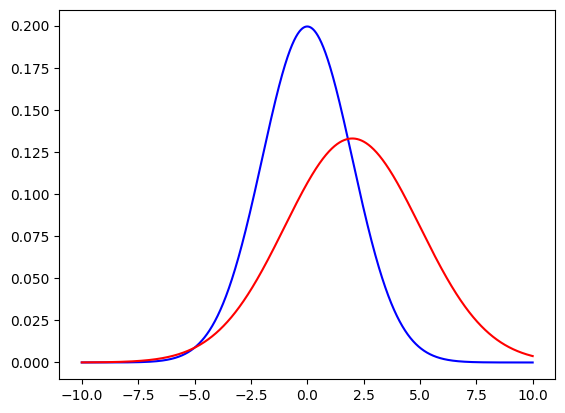

In [28]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 3)
plt.plot(x, p, c="blue")
plt.plot(x, q, c="red")

In [29]:
kl(p, q)

np.float64(349.91348337868124)

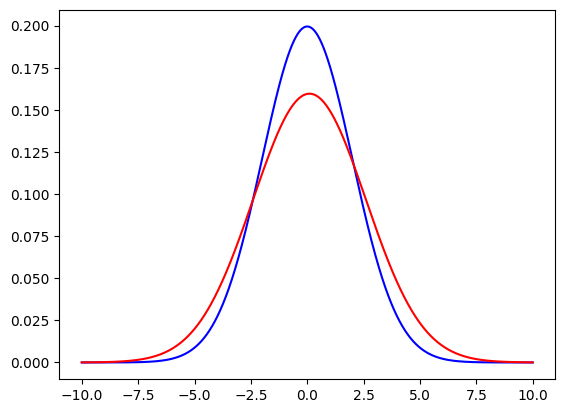

In [30]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 0.1, 2.5)
plt.plot(x, p, c="blue")
plt.plot(x, q, c="red")

In [31]:
kl(p, q)

np.float64(43.94620233653506)

In [32]:
data = pd.read_csv("../../datasets/weight-height.csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [33]:
data.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


<Axes: >

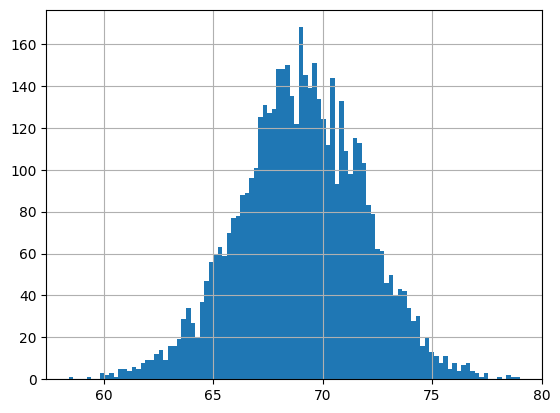

In [34]:
males = data[data['Gender'] == 'Male']['Height']
males.hist(bins=100)

In [35]:
males.describe()['mean']

np.float64(69.02634590621741)

In [36]:
males.describe()['std']

np.float64(2.863362228660647)

In [37]:
count, devision = np.histogram(males, bins=100)
print(count)
print(devision)

[  1   0   0   0   1   0   0   3   2   3   1   5   5   4   6   5   8   9
   9  12  14   9  16  16  19  29  34  27  20  37  47  56  60  63  59  70
  77  78  88  89  96 101 125 131 127 129 148 148 150 135 122 168 145 139
 151 134 124 112 144  93 133 109  98 115 113 103  83  79  62  61  46  50
  40  43  42  34  28  30  16  20  13  11   8  11   5   8   4   7   8   4
   3   1   3   0   0   1   0   2   1   1]
[58.40690493 58.61282331 58.81874168 59.02466005 59.23057843 59.4364968
 59.64241518 59.84833355 60.05425192 60.2601703  60.46608867 60.67200705
 60.87792542 61.0838438  61.28976217 61.49568054 61.70159892 61.90751729
 62.11343567 62.31935404 62.52527241 62.73119079 62.93710916 63.14302754
 63.34894591 63.55486429 63.76078266 63.96670103 64.17261941 64.37853778
 64.58445616 64.79037453 64.9962929  65.20221128 65.40812965 65.61404803
 65.8199664  66.02588478 66.23180315 66.43772152 66.6436399  66.84955827
 67.05547665 67.26139502 67.46731339 67.67323177 67.87915014 68.08506852
 68.290986

In [38]:
ideal = norm.rvs(size=len(males), loc=males.describe()['mean'], scale=males.describe()['std'])
ideal

array([66.73097178, 71.71280268, 68.65686453, ..., 68.41565889,
       72.63913058, 69.1996387 ])

In [39]:
ideal_count, ideal_devision = np.histogram(ideal, bins=100)
print(ideal_count)
print(ideal_devision)

[  2   0   0   2   0   2   1   4   3   0   3   1  10  11   6  10   9   8
  16  13  15  25  27  28  26  31  40  39  52  58  52  74  56  85  68 100
 103  93 109 112 135 143 131 151 124 149 123 125 128 125 138 149 122 118
 141 136 111 111 118 114  98  91  92  89  75  83  62  64  50  58  52  49
  32  36  27  26  17  18   9  12  11   8  11  16   8   2   3   1   4   2
   2   2   1   1   0   0   0   0   0   2]
[59.24354238 59.44342497 59.64330757 59.84319016 60.04307275 60.24295535
 60.44283794 60.64272053 60.84260313 61.04248572 61.24236831 61.44225091
 61.6421335  61.84201609 62.04189869 62.24178128 62.44166387 62.64154646
 62.84142906 63.04131165 63.24119424 63.44107684 63.64095943 63.84084202
 64.04072462 64.24060721 64.4404898  64.6403724  64.84025499 65.04013758
 65.24002018 65.43990277 65.63978536 65.83966796 66.03955055 66.23943314
 66.43931573 66.63919833 66.83908092 67.03896351 67.23884611 67.4387287
 67.63861129 67.83849389 68.03837648 68.23825907 68.43814167 68.63802426
 68.837906

(array([  2.,   0.,   0.,   2.,   0.,   2.,   1.,   4.,   3.,   0.,   3.,
          1.,  10.,  11.,   6.,  10.,   9.,   8.,  16.,  13.,  15.,  25.,
         27.,  28.,  26.,  31.,  40.,  39.,  52.,  58.,  52.,  74.,  56.,
         85.,  68., 100., 103.,  93., 109., 112., 135., 143., 131., 151.,
        124., 149., 123., 125., 128., 125., 138., 149., 122., 118., 141.,
        136., 111., 111., 118., 114.,  98.,  91.,  92.,  89.,  75.,  83.,
         62.,  64.,  50.,  58.,  52.,  49.,  32.,  36.,  27.,  26.,  17.,
         18.,   9.,  12.,  11.,   8.,  11.,  16.,   8.,   2.,   3.,   1.,
          4.,   2.,   2.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([59.24354238, 59.44342497, 59.64330757, 59.84319016, 60.04307275,
        60.24295535, 60.44283794, 60.64272053, 60.84260313, 61.04248572,
        61.24236831, 61.44225091, 61.6421335 , 61.84201609, 62.04189869,
        62.24178128, 62.44166387, 62.64154646, 62.84142906, 63.04131165,
        63.24119424, 63.44

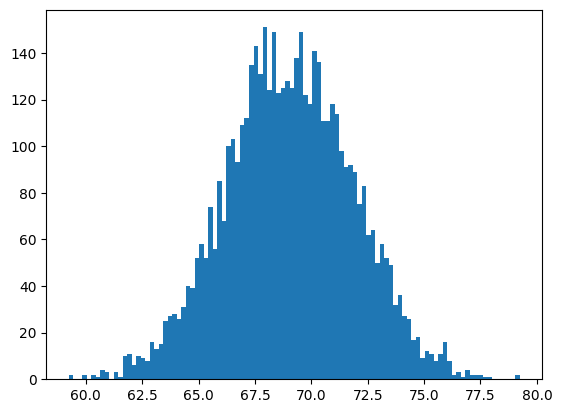

In [40]:
plt.hist(ideal, bins=100)

In [41]:
kl(count, ideal_count)

C:\Users\Soheil\AppData\Local\Temp\ipykernel_8224\4271909869.py:2: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_8224\4271909869.py:2: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_8224\4271909869.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_8224\4271909869.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


np.float64(165.68471023115677)

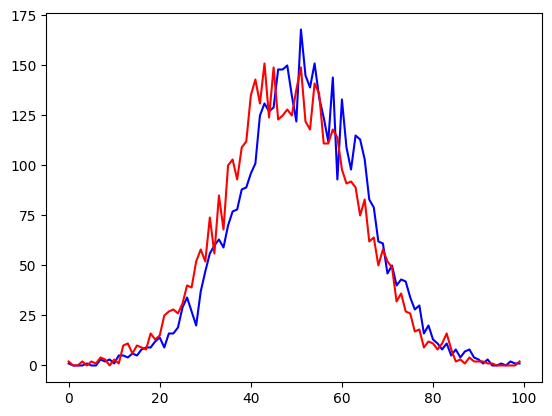

In [42]:
plt.plot(count, c="blue")
plt.plot(ideal_count, c="red")

In [43]:
count = count / 5000
ideal_count = ideal_count / 5000

In [44]:
kl(count, ideal_count)

C:\Users\Soheil\AppData\Local\Temp\ipykernel_8224\4271909869.py:2: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_8224\4271909869.py:2: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_8224\4271909869.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\Soheil\AppData\Local\Temp\ipykernel_8224\4271909869.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


np.float64(0.03313694204623135)

Remember: ```kl(p, q) != kl(q, p)```